#### **1. Importando Pacote e módulos necessários**

Instalação dos módulos necessários.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp

In [19]:
# Importando o Rede Imunológica Artificial.
from aisp.imnet import AiNet

 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn.preprocessing import MinMaxScaler
import networkx as nx

from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import squareform, pdist

In [20]:
def plot_immune_network(train_x, train_y, predict_y, model, title_prefix=""):
    clusters = list(model._memory_network.values())
    network = np.array(model._population_antibodies)
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    colors = colormaps.get_cmap('Accent')

    color_map = {'long': 'green', 'short': 'red'}

    # Criando uma lista de cores baseada no train_y categórico
    colors_train = [color_map[label] for label in train_y]

    # Dados originais
    axs[0][0].scatter(train_x[:, 0], train_x[:, 1], color=colors_train, alpha=0.9, s=50, marker='o', edgecolors='k')
    axs[0][0].set_title(f'{title_prefix}Dados Originais', fontsize=16)
    axs[0][0].set_xlabel('X', fontsize=14)
    axs[0][0].set_ylabel('Y', fontsize=14)
    axs[0][0].grid(True, linestyle='--', alpha=0.5)

    # População de anticorpos
    axs[0][1].scatter(network[:, 0], network[:, 1], color='crimson', alpha=0.9, s=70, marker='.', edgecolors='k')
    axs[0][1].set_title(f'{title_prefix}População de Anticorpos', fontsize=16)
    axs[0][1].set_xlabel('X', fontsize=14)
    axs[0][1].set_ylabel('Y', fontsize=14)
    axs[0][1].grid(True, linestyle='--', alpha=0.5)

    # Previsões dos clusters
    scatter = axs[1][0].scatter(train_x[:, 0], train_x[:, 1], c=predict_y, cmap='Accent', s=50, edgecolors='k', alpha=0.9)
    axs[1][0].set_title(f'{title_prefix}Previsões dos Clusters (AiNet)', fontsize=16)
    axs[1][0].set_xlabel('X', fontsize=14)
    axs[1][0].set_ylabel('Y', fontsize=14)
    axs[1][0].grid(True, linestyle='--', alpha=0.5)
    legend1 = axs[1][0].legend(*scatter.legend_elements(), title="Clusters")
    axs[1][0].add_artist(legend1)

    # Grafo da Rede Imune
    G = nx.Graph()
    positions = {}
    for i, cluster in enumerate(clusters):
        cluster_nodes = [f'{i}_{j}' for j in range(len(cluster))]
        G.add_nodes_from(cluster_nodes)
        for node, point in zip(cluster_nodes, cluster):
            positions[node] = tuple(point)
        dist_matrix = squareform(pdist(cluster))
        mst_local = minimum_spanning_tree(dist_matrix).toarray()
        for row_idx, row in enumerate(mst_local):
            for col_idx, weight in enumerate(row):
                if weight > 0:
                    G.add_edge(cluster_nodes[row_idx], cluster_nodes[col_idx], weight=weight)
    for i, cluster in enumerate(clusters):
        cluster_nodes = [f'{i}_{j}' for j in range(len(cluster))]
        nx.draw_networkx_nodes(G, positions, nodelist=cluster_nodes, ax=axs[1][1],
                               node_color=[colors(i)], node_size=70, edgecolors='k', label=f'Cluster {i}')
    nx.draw_networkx_edges(G, positions, ax=axs[1][1], alpha=0.6)
    axs[1][1].set_title(f'{title_prefix}Rede Imune Grafo', fontsize=16)
    axs[1][1].set_xlabel('X', fontsize=14)
    axs[1][1].set_ylabel('Y', fontsize=14)
    axs[1][1].grid(True, linestyle='--', alpha=0.5)
    axs[1][1].legend()
    plt.tight_layout()
    plt.show()

#### **2. Função para normalizar os dados entre 0 e 1**

In [21]:
# função para normalizar os dados utilizando funções do scikit-learn.
def normalize_dados(dados):
    scaler = MinMaxScaler().fit(dados)
    return scaler.transform(dados)

#### **3. Carregar a base de dados usando o pacote seaborn**

Carregando a base de dados “Geyser” através da biblioteca Seaborn. Ela contém informações sobre tempo de erupção do gêiser Old Faithful com duas características, duração e tempo entre as erupções. Logo, as saídas são o tipo de erupções longas (“long”) ou curtas (“short”).
Essa base de dados também está disponível nos seguintes links, [kaggle](https://www.kaggle.com/datasets/pyim59/cours-ml-geyser) e [Github](https://github.com/mwaskom/seaborn-data/blob/master/geyser.csv)

In [22]:
amostrasName = ['duration', 'waiting']
geyser = sns.load_dataset('geyser')
dados = np.array(geyser.get(amostrasName))
classes = np.array(geyser.get('kind'))
# Normalizando os dados entre 0 e 1
dados = normalize_dados(dados)

#### 4. Treinando e visualizando o AiNet nos dados de "moons"
O modelo irá identificar padrões e formar clusters e classificar as amostras.

In [23]:
# Model Initialization
model = AiNet(suppression_threshold=0.95, affinity_threshold=0.96)

predict_y = model.fit_predict(dados)

✔ Set of memory antibodies for classes (0, 1) successfully generated:  ┇██████████┇ 10/10 total training interactions


#### 6. Treinando e visualizando o AiNet nos dados de "moons"

Exibe quatro gráficos: os dados originais, a população de anticorpos, os clusters previstos pelo AiNet e o grafo da rede imune formada.

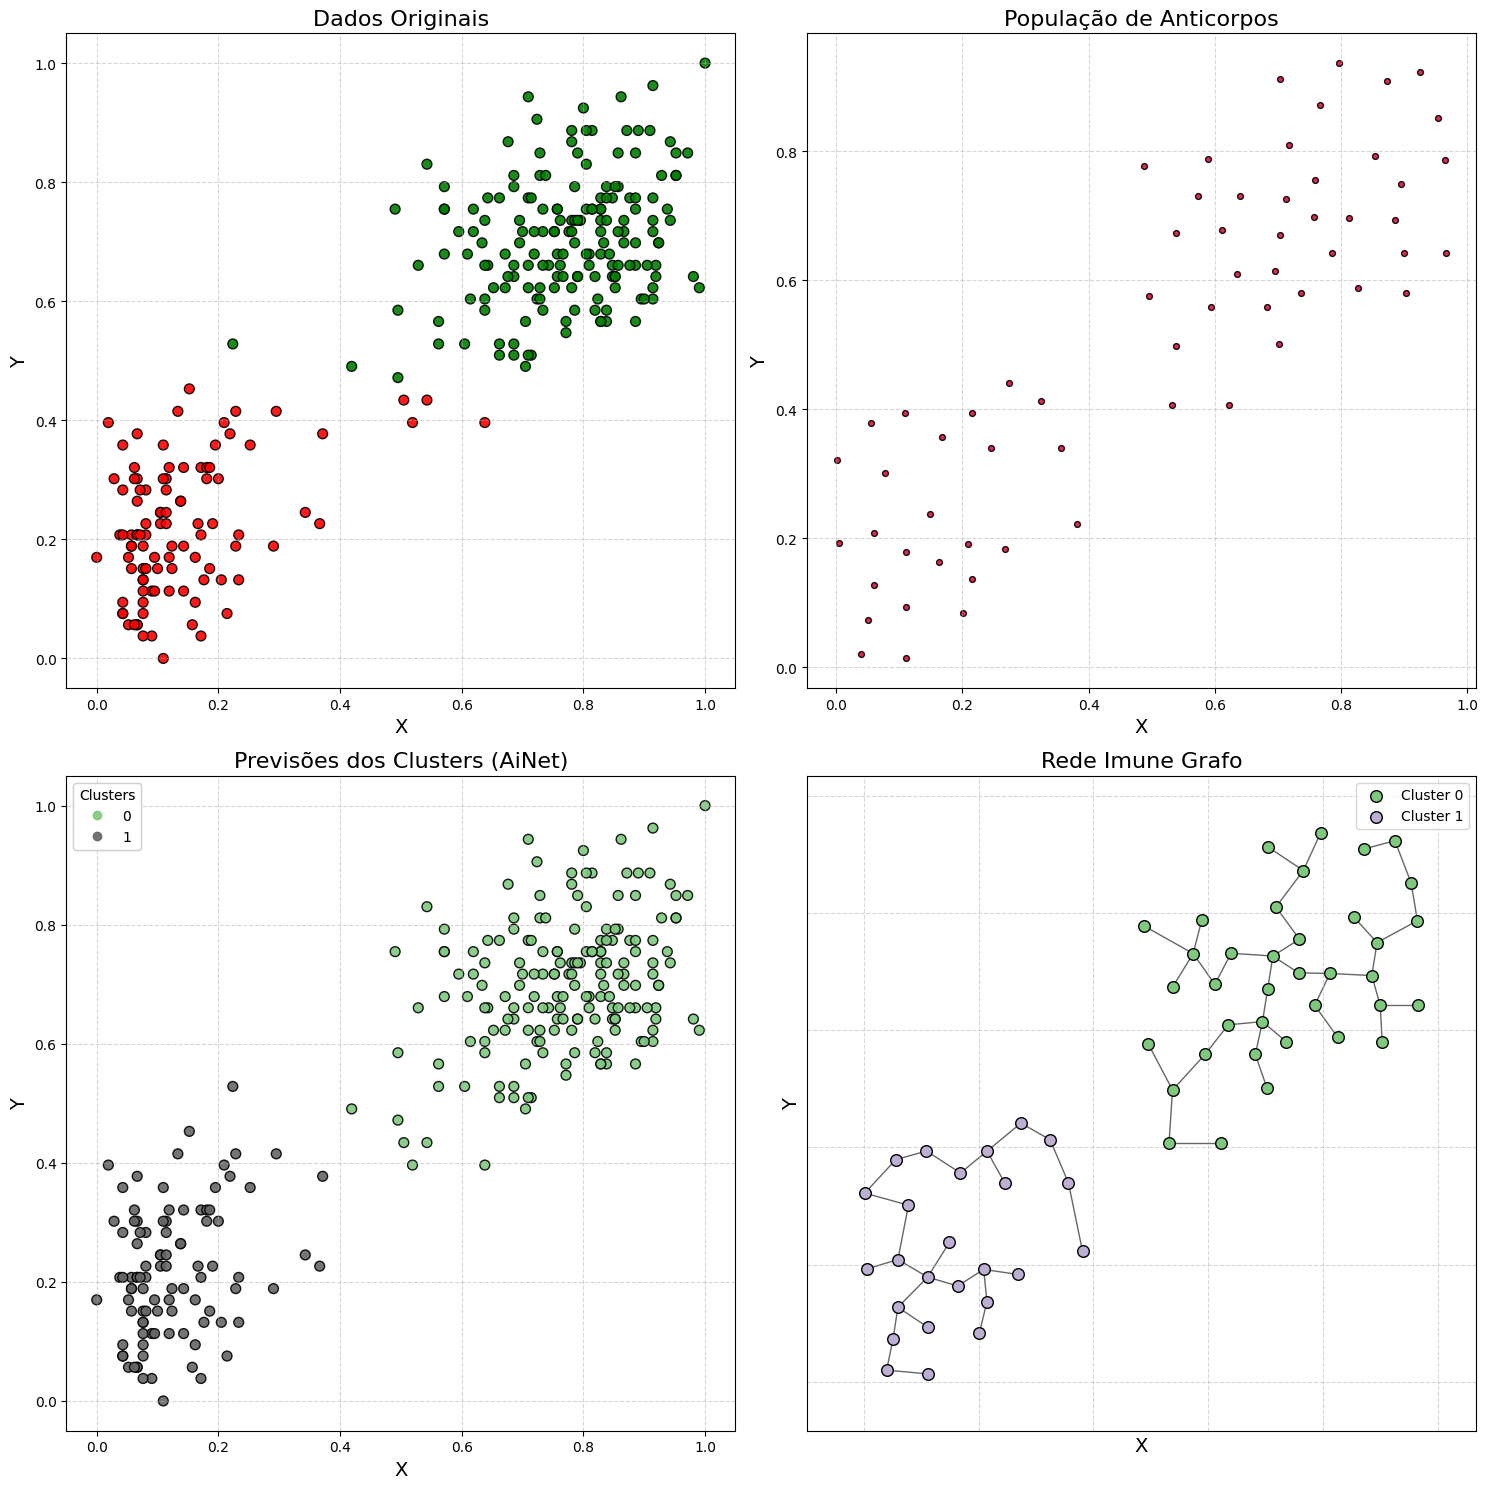

In [24]:
plot_immune_network(dados, classes, predict_y, model, title_prefix="")